<a href="https://colab.research.google.com/github/Josh0527/Privacy-Preserving-Synthetic-Data-Generation/blob/main/Privacy_Preserving_Synthetic_Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.DataFrame(X)
df1 = pd.DataFrame(y)

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States


In [ ]:
df1.head(2)

,income
0,<=50K
1,<=50K


In [ ]:
df2 = pd.concat([df,df1],axis=1)
df2.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df2.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [ ]:
df2.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [ ]:
def count_question_marks(df, columns):
  """Counts the number of '?' entries in specified columns of a DataFrame.

  Args:
    df: The pandas DataFrame.
    columns: A list of column names to check.

  Returns:
    A dictionary where keys are column names and values are the counts of '?'.
  """
  counts = {}
  for col in columns:
    counts[col] = df[df[col] == '?'][col].count()
  return counts

# Now, call the function once
missing_counts = count_question_marks(df2, ['occupation', 'workclass', 'native-country'])

# Access the counts from the dictionary
occupation_missing = missing_counts['occupation']
workclass_missing = missing_counts['workclass']
native_country_missing = missing_counts['native-country']

In [ ]:
occupation_missing, workclass_missing, native_country_missing

(1843, 1836, 583)

Notably, the 'occupation' and 'workclass' columns have a similar number of missing entries, suggesting a possible correlation.

In [ ]:
#impute rows with '?'
def encode_and_mode_impute(dff):
    # Replace '?' with NaN in the entire DataFrame
    dff.replace(' ?', np.nan, inplace=True)

    # List of categorical columns
    categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country', 'salary']

    # For columns with missing values, impute using MODE (most frequent value)
    for col in ['workclass', 'occupation', 'native-country']:
        mode_val = dff[col].mode()[0]
        dff[col].fillna(mode_val, inplace=True)

    # Remove duplicates and reset index for cleanliness
    dff.drop_duplicates(inplace=True)
    dff.reset_index(drop=True, inplace=True)

    return dff

#Apply
df3= encode_and_mode_impute(df2)

# Verify that there are no missing values remaining
print("Missing values after mode-based imputation:")
print(df3.isnull().sum())

# Display the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame Head:")
print(df3.head())


Missing values after mode-based imputation:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Cleaned DataFrame Head:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  

<ipython-input-13-407c0a979464>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff[col].fillna(mode_val, inplace=True)


In [ ]:
df3.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
#summary statistics for numerical features
print("Summary Statistics (Numerical Features):")
print(df3.describe())

#for categorical features
print("\nSummary Statistics (Categorical Features):")
print(df3.describe(include=['object']))


Summary Statistics (Numerical Features):
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48813.000000  4.881300e+04   48813.000000  48813.000000  48813.000000   
mean      38.647348  1.896679e+05      10.078688   1079.708705     87.554299   
std       13.709005  1.056062e+05       2.570257   7454.185982    403.118605   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175550e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781400e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376200e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48813.000000  
mean        40.425051  
std         12.390954  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Summary Statistics (C

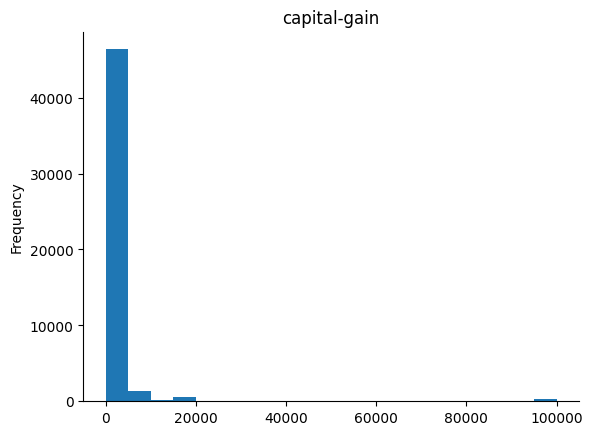

In [ ]:
# @title capital-gain

from matplotlib import pyplot as plt
df3['capital-gain'].plot(kind='hist', bins=20, title='capital-gain')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df3['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

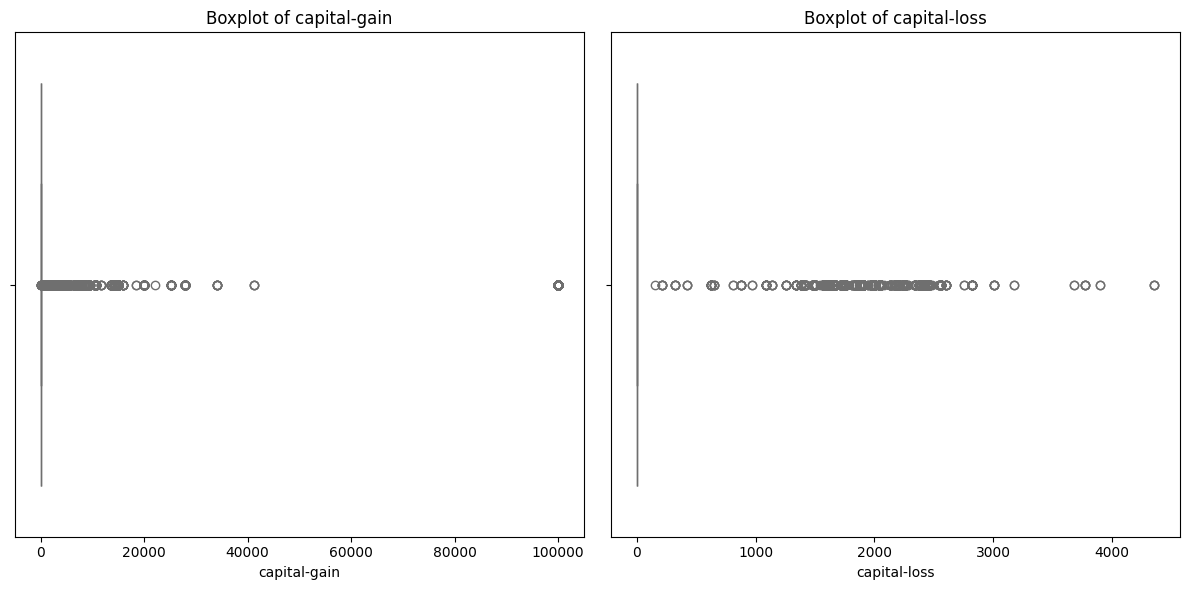

In [ ]:
# List of columns to inspect for outliers
outlier_cols = ['capital-gain', 'capital-loss']

# 1. Boxplots for "capital-gain" and "capital-loss"
plt.figure(figsize=(12, 6))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df3[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

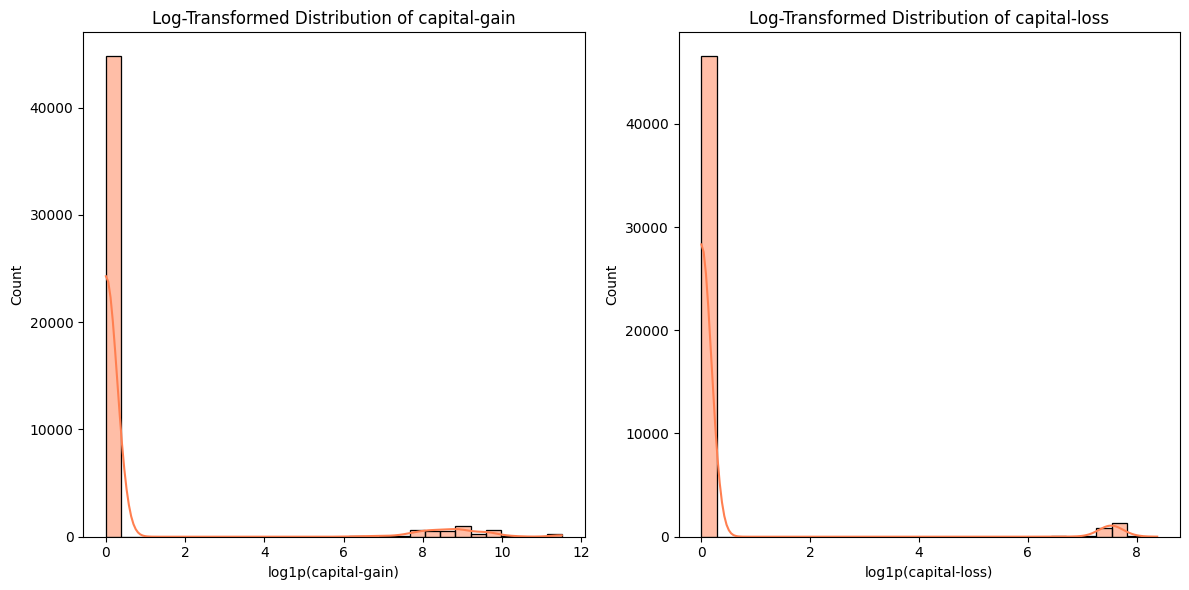

In [ ]:
# 2. Log-transformed histograms (using log1p to handle zeros)
plt.figure(figsize=(12, 6))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(1, 2, i)
    # np.log1p is used to apply log(1+x), which handles zero values gracefully
    sns.histplot(np.log1p(df3[col]), bins=30, kde=True, color='coral')
    plt.title(f"Log-Transformed Distribution of {col}")
    plt.xlabel(f"log1p({col})")
plt.tight_layout()
plt.show()